## APS 2 - Transferência de Calor

### Luca Mizrahi, Gustavo Oliveira, Arthur Tamm

#### Tarefa 3

In [37]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Definindo parâmetros	
n = 1
K = 1 # m^2/s
alpha = 1 # m/s
T = 3 # s
Q = 100 # kg / ms
Lx = 30 # m
Ly = 20 # m
a = n / 1.4 # m
b = 60 / (n+5) # m

delta_x = 0.5 # m
delta_y = 0.5 # m
# delta_t = delta_x ** 2 / (4*K) - 0.01 # s
delta_t = 0.05
# delta_t

a_idx = int(a / delta_x)
b_idx = int(b / delta_y)

tempo_total = 10*T
tempo = np.arange(0, tempo_total, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
c = int(Lx/delta_x) # numero de colunas
l = int(Ly/delta_y) # numero de linhas
C = np.zeros((l, c))

In [39]:
# Dimensões da matriz de concentração
c, l

(60, 40)

In [71]:
Cf = np.copy(C)
Cp = np.copy(C)
ERRO = 0.23
for t in tempo: 

    if t <= T:
        Cp[a_idx, b_idx] += Q / (delta_x * delta_y) * delta_t # kg / ms

    for i in range(1, l - 1):
        for j in range(1, c - 1):

            # if((t <= T) and abs(i*delta_x - b) <= ERRO and abs(j*delta_y - a) <= ERRO ):
            #     qc = Q / (delta_x * delta_y) # kg / ms
            # else: 
            #     qc = 0

            t1 = (Cp[i][j+1] - Cp[i][j-1]) / (2*delta_x)
            t2 = np.sin(np.pi/5 * i * delta_x) * (Cp[i+1][j] - Cp[i-1][j]) / (2*delta_y)
            t3 = (Cp[i][j+1] - 2*Cp[i][j] + Cp[i][j-1]) / (delta_x**2)
            t4 = (Cp[i+1][j] - 2*Cp[i][j] + Cp[i-1][j]) / (delta_y**2)

            Cf[i][j] = Cp[i][j] + delta_t * (- alpha * (t1 + t2) + K * (t3 + t4))
            
            if Cf[i][j] < 0:
                Cf[i][j] = 0
    
    #Linha 0 = linha 1
    Cf[0,:] = Cf[1,:]
    #Linha l-1 = linha l-2
    Cf[-1,:] = Cf[-2,:]
    #Coluna 0 = coluna 1
    Cf[:,0] = Cf[:,1]
    #Coluna c-1 = coluna c-2
    Cf[:,-1] = Cf[:,-2]


    # if(Erro.mai() < 0.0001):
    #     print('Convergiu em ', 10*t, ' ms.')
    #     break
    Cp = Cf.copy()

In [73]:
np.max(Cf)

2.4930439868560494

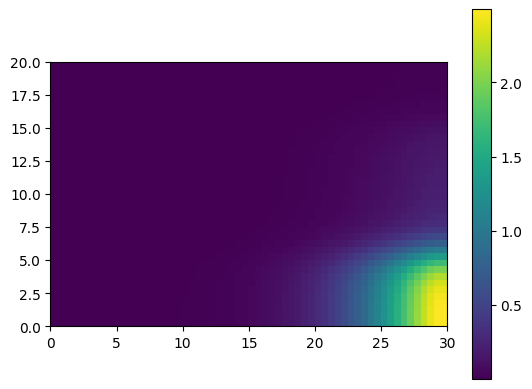

In [74]:
plt.imshow(Cf, extent=[0,Lx,Ly,0])
plt.gca().invert_yaxis()

cbar = plt.colorbar()

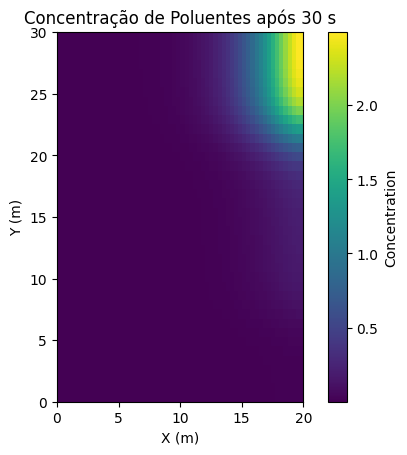

In [75]:
#Graficos
plt.imshow(Cf, cmap='viridis', extent=[0, Ly, 0, Lx])
plt.colorbar(label='Concentration')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title(f'Concentração de Poluentes após {tempo_total} s')
plt.show()

### Teste Do Programa

In [44]:
# Definindo parâmetros

K = 1 # m^2/s
alpha = 1 # m/s
T = 2 # s
Q = 80 # kg / ms
Lx = 30 # m
Ly = 30 # m
a = 15 # m
b = 15 # m

delta_x = 0.5  # m
delta_y = 0.5 # m
delta_t = 0.05 # s
# delta_t
# ERRO = 0.1

tempo = np.arange(0, 5, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
c = int(Lx/delta_x) # numero de colunas
l = int(Ly/delta_y) # numero de linhas
C = np.zeros((l, c))

In [45]:
# Dimensões da matriz de concentração
c, l

(60, 60)

In [46]:
Cf = np.copy(C)
Cp = np.copy(C)
ERRO = 0
for t in tempo: 
    for i in range(1, l - 1):
        for j in range(1, c - 1):

            if((t <= T) and abs(i*delta_x - b) <= ERRO and abs(j*delta_y - a) <= ERRO ):
                qc = Q / (delta_x * delta_y) # kg / ms
            else: 
                qc = 0

            t1 = (Cp[i][j+1] - Cp[i][j-1]) / (2*delta_x)
            t2 = 0*np.sin(np.pi/5 * i * delta_x) * (Cp[i+1][j] - Cp[i-1][j]) / (2*delta_y)
            t3 = (Cp[i][j+1] - 2*Cp[i][j] + Cp[i][j-1]) / (delta_x**2)
            t4 = (Cp[i+1][j] - 2*Cp[i][j] + Cp[i-1][j]) / (delta_y**2)
            
            Cf[i][j] = Cp[i][j] + delta_t * (qc - (alpha * (t1 + t2)) + K * (t3 + t4))
            
            if Cf[i][j] < 0:
                Cf[i][j] = 0
    
    #Linha 0 = linha 1
    Cf[0,:] = Cf[1,:]
    #Linha l-1 = linha l-2
    Cf[-1,:] = Cf[-2,:]
    #Coluna 0 = coluna 1
    Cf[:,0] = Cf[:,1]
    #Coluna c-1 = coluna c-2
    Cf[:,-1] = Cf[:,-2]


    # if(Erro.mai() < 0.0001):
    #     print('Convergiu em ', 10*t, ' ms.')
    #     break
    Cp = Cf.copy()

In [47]:
np.max(Cf)

3.3236350710035465

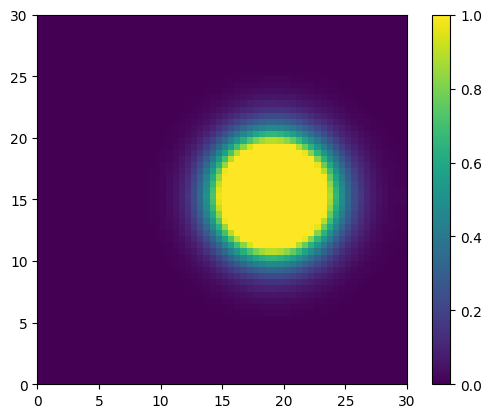

In [48]:
plt.imshow(Cf, extent=[0,Lx,Ly,0], vmax = 1)
plt.gca().invert_yaxis()

cbar = plt.colorbar()

In [49]:
Cf[40][40]

0.6125532769082151